<a href="https://colab.research.google.com/github/mandesai/SciforTechnologies/blob/main/Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

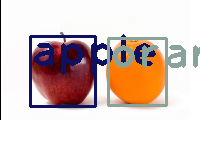

In [5]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

net = cv2.dnn.readNet("/content/drive/MyDrive/yolov3.weights", "/content/drive/MyDrive/yolov3.cfg")
classes = []

with open("/content/coco.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

img = cv2.imread("/content/apple and orange.png")
img = cv2.resize(img, None, fx=0.4, fy = 0.4)
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      center_x = int(detection[0] *width)
      center_y = int(detection[1] * height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      x = int(center_x - w/2)
      y = int(center_y - h /2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size=(len(classes),3))

for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[class_ids[i]]
    cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
    cv2.putText(img, label, (x,y+30), font, 3, color,3)


cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

